# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings, string
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import torch
#from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from transformers import Trainer, TrainingArguments
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
!pip install lightgbm

In [ ]:
import xgboost as xgb
import lightgbm as lgb

In [ ]:
from collections import Counter

In [ ]:
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# Dataset

In [ ]:
df = pd.read_csv('/content/fake reviews dataset.csv',encoding='latin-1');
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [ ]:
df = df.rename(columns={'text_': 'text'})

In [ ]:
df.shape

(40432, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text      40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


# Data Cleaning

## Check null values

In [ ]:
df.isnull().sum()

,0
category,0
rating,0
label,0
text,0


## Check duplicated values

In [ ]:
df.duplicated().sum()

np.int64(12)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

## Clean review text

### Removing punctuation marks and stop words from text

In [ ]:
def clean_text(text):
    nopunc = [w for w in text if w not in string.punctuation]  #checks each char
    nopunc = ''.join(nopunc)     #converting list to a string
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english') and not word.isdigit()]
    return ' '.join(clean_words)

In [ ]:
df['text'].head().apply(clean_text)

,text
0,Love Well made sturdy comfortable love itVery ...
1,love great upgrade original Ive mine couple years
2,pillow saved back love look feel pillow
3,Missing information use great product price
4,nice set Good quality set two months


In [ ]:
df['text'] = df['text'].apply(clean_text)

In [ ]:
df['text']

,text
0,Love Well made sturdy comfortable love itVery ...
1,love great upgrade original Ive mine couple years
2,pillow saved back love look feel pillow
3,Missing information use great product price
4,nice set Good quality set two months
...,...
40427,read reviews saying bra ran small ordered TWO ...
40428,wasnt sure exactly would little large small si...
40429,wear hood wear hood wear jacket without hood 3...
40430,liked nothing dress reason gave stars ordered ...


In [ ]:
# def preprocess(text):
#     return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])

In [ ]:
df['text'] = df['text'].str.lower()

In [ ]:
stemmer = PorterStemmer()
def stem_words(text):
    stemmed = [stemmer.stem(word) for word in text.split()]
    return ' '.join(stemmed)

In [ ]:
df['text'] = df['text'].apply(stem_words)

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    lemmatized = [lemmatizer.lemmatize(word) for word in text.split()]
    return ' '.join(lemmatized)

In [ ]:
df["text"] = df["text"].apply(lemmatize_words)

In [ ]:
processed_df = df.copy()
processed_df.to_csv('processed_df.csv', index=False)

In [ ]:
df = pd.read_csv('/content/processed_df.csv')
df

,category,rating,label,text
0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort love itveri pretti
1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin ive mine coupl year
2,Home_and_Kitchen_5,5.0,CG,pillow save back love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price
4,Home_and_Kitchen_5,5.0,CG,nice set good qualiti set two month
...,...,...,...,...
40415,Clothing_Shoes_and_Jewelry_5,4.0,OR,read review say bra ran small order two band c...
40416,Clothing_Shoes_and_Jewelry_5,5.0,CG,wasnt sure exactli would littl larg small size...
40417,Clothing_Shoes_and_Jewelry_5,2.0,OR,wear hood wear hood wear jacket without hood 3...
40418,Clothing_Shoes_and_Jewelry_5,1.0,CG,like noth dress reason gave star order size fi...


## Processed data

In [ ]:
df

,category,rating,label,text
0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort love itveri pretti
1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin ive mine coupl year
2,Home_and_Kitchen_5,5.0,CG,pillow save back love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price
4,Home_and_Kitchen_5,5.0,CG,nice set good qualiti set two month
...,...,...,...,...
40415,Clothing_Shoes_and_Jewelry_5,4.0,OR,read review say bra ran small order two band c...
40416,Clothing_Shoes_and_Jewelry_5,5.0,CG,wasnt sure exactli would littl larg small size...
40417,Clothing_Shoes_and_Jewelry_5,2.0,OR,wear hood wear hood wear jacket without hood 3...
40418,Clothing_Shoes_and_Jewelry_5,1.0,CG,like noth dress reason gave star order size fi...


# Exploratory Data Analysis

## Analyzing Distribution of Labels

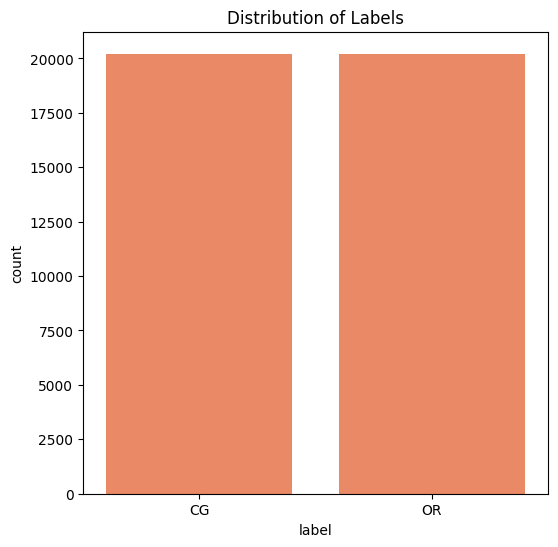

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='label',data=df, color='coral')
plt.title('Distribution of Labels')
plt.show()

Data is balanced with equal count of 'CG' and 'OR' labels

## Analyzing Rating using Pie Chart

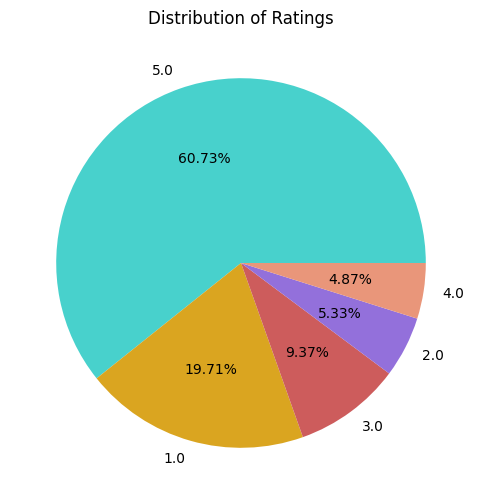

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(x=df['rating'].value_counts(),labels=df.rating.unique(),autopct='%1.2f%%', colors=['#48D1CC', '#DAA520', '#CD5C5C', '#9370DB', '#E9967A'])
plt.title('Distribution of Ratings')
plt.show()

## Grouping Ratings for each Label

In [ ]:
df.groupby('label').describe()

rating                                             
         count      mean       std  min  25%  50%  75%  max
label                                                      
CG     20205.0  4.259490  1.141245  1.0  4.0  5.0  5.0  5.0
OR     20215.0  4.253228  1.147668  1.0  4.0  5.0  5.0  5.0

In [ ]:
grouped_data = df.groupby('label')['rating'].value_counts()
grouped_data

label  rating
CG     5.0       12308
       4.0        3920
       3.0        1952
       1.0        1063
       2.0         962
OR     5.0       12239
       4.0        4045
       3.0        1834
       1.0        1092
       2.0        1005
Name: count, dtype: int64

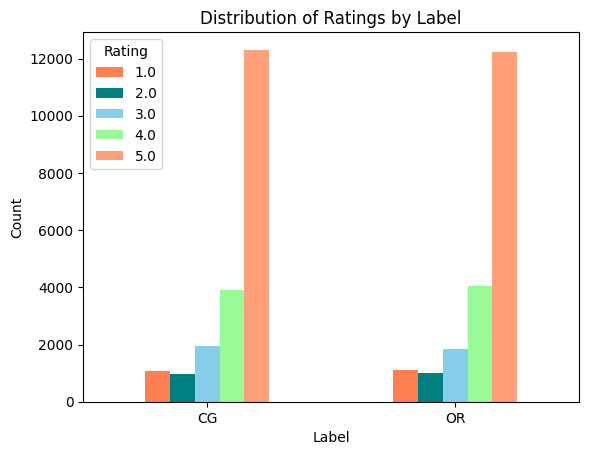

In [ ]:
grouped_data = grouped_data.unstack()

grouped_data.plot(kind='bar', color=['#FF7F50', '#008080', '#87CEEB', '#98FB98', '#FFA07A'])
plt.title('Distribution of Ratings by Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Rating')
plt.show()

In [ ]:
df.isnull().sum()

,0
category,0
rating,0
label,0
text,1


In [ ]:
df.dropna(inplace=True)

## Analyzing Review Length Distribution of Text Generated by each Label

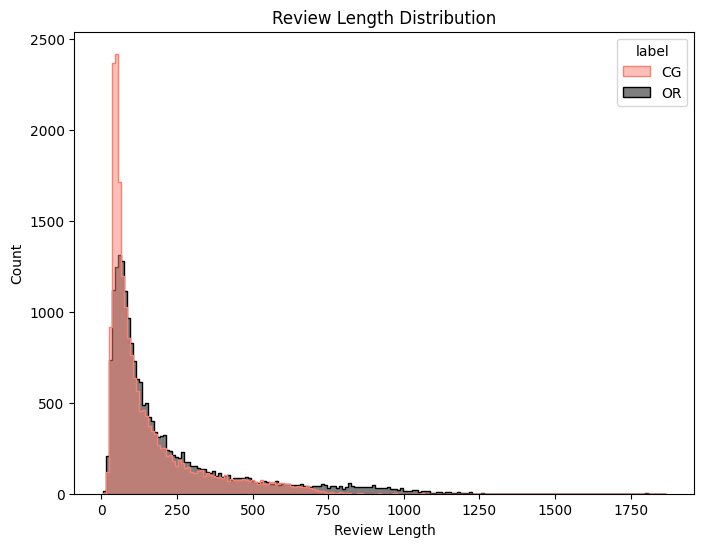

In [ ]:
df['review_length'] = df['text'].apply(len)

plt.figure(figsize=(8, 6))
sns.histplot(x='review_length', data=df, hue='label', element='step', palette=['salmon','black'],alpha=0.5)
plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

## Visualizing the Most Frequent Words in Both Labels Separately

### Word Cloud Visualization

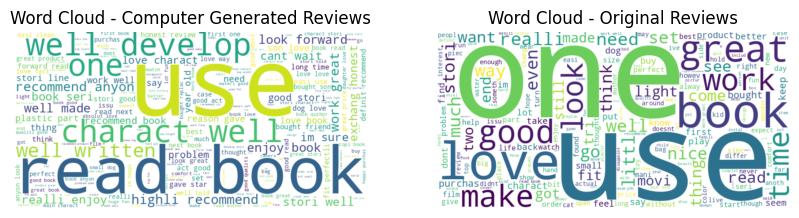

In [ ]:
fake_reviews_text = ' '.join(df[df['label'] == 'CG']['text'].astype(str).tolist())
real_reviews_text = ' '.join(df[df['label'] == 'OR']['text'].astype(str).tolist())

wordcloud_fake = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(fake_reviews_text)
wordcloud_real = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(real_reviews_text)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud - Computer Generated Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Word Cloud - Original Reviews')
plt.axis('off')

plt.show()

### Term Frequency Distribution

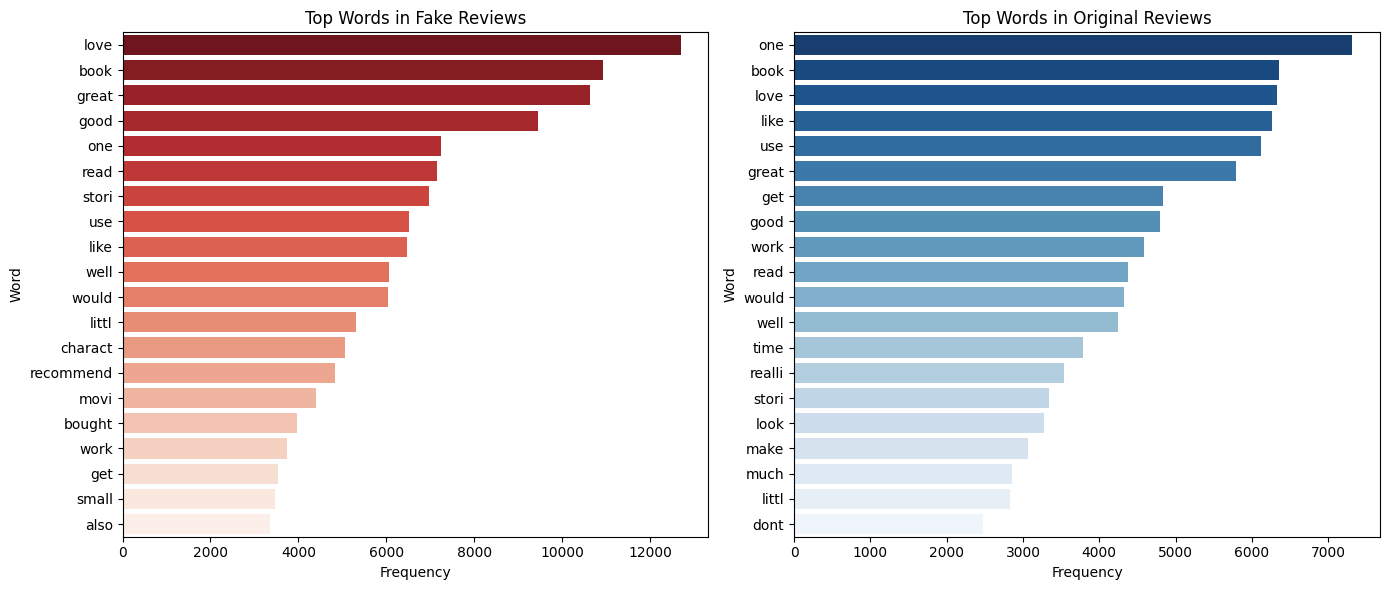

In [ ]:
def get_top_words(preprocessed_reviews, top_n=20):
    words = [word for review in preprocessed_reviews for word in review.split()]
    counter = Counter(words)
    return counter.most_common(top_n)

top_fake_words = get_top_words(df[df['label'] == 'CG']['text'])
top_original_words = get_top_words(df[df['label'] == 'OR']['text'])

fake_words_df = pd.DataFrame(top_fake_words, columns=['Word', 'Frequency'])
original_words_df = pd.DataFrame(top_original_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Frequency', y='Word', data=fake_words_df, palette='Reds_r')
plt.title('Top Words in Fake Reviews')

plt.subplot(1, 2, 2)
sns.barplot(x='Frequency', y='Word', data=original_words_df, palette='Blues_r')
plt.title('Top Words in Original Reviews')

plt.tight_layout()
plt.show()

# Understanding Feature Extraction Models

## Applying Count Vectorizer to Tranform Cleaned Text into a Numerical Matrix (bag-of-words)

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
def text_process(review, stop_words=stop_words):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stop_words]

In [ ]:
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x7f221ce39760>)

In [ ]:
bow_transformer.fit(df['text'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 36397


### Checking the BOW model on a single review

In [ ]:
review5 = df['text'][4]
review5

'nice set good qualiti set two month'

In [ ]:
bow_msg5 = bow_transformer.transform([review5])
print(bow_msg5)
print(bow_msg5.shape)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6 stored elements and shape (1, 36397)>
  Coords	Values
  (0, 13643)	1
  (0, 20988)	1
  (0, 21867)	1
  (0, 25645)	1
  (0, 28362)	2
  (0, 33231)	1
(1, 36397)


There are 6 unique words in the 5th review with 'set' appearing twice

### Applying the BOW model to all the reviews in the dataset

In [ ]:
bow_reviews = bow_transformer.transform(df['text'])

In [ ]:
print("Shape of Bag of Words Transformer for all the reviews in the dataset: ",bow_reviews.shape)
print("Amount of non zero values in the bag of words model: ",bow_reviews.nnz)

Shape of Bag of Words Transformer for all the reviews in the dataset:  (40419, 36397)
Amount of non zero values in the bag of words model:  1007210


In [ ]:
#fraction of non-zero elements in the matrix
print("Density: ",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Density:  0.07


A density of 0.07% implies that only a very small proportion of the total entries in the matrix contain non-zero values. This indicates that the matrix is highly sparse, with most features in the dataset being inactive or unused in the majority of reviews.

### Applying tf-idf to improve the representation of text

TF-IDF is applied to the BoW model to re-weight the word counts based on their frequency within the specific document and their importance across the corpus.

In [ ]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)

In [ ]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['small']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['book']])

3.343231859588706
2.8238370272167073


The tfidf now produces a matrix containing the product of term frequency (tf) and inverse document frequency (idf) of the words (tf-idf score). Words that appear in many documents get a low IDF score, while those that appear in fewer documents get a higher score.

In [ ]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)

Shape: (40419, 36397)


# Model Training and Testing

## Splitting into Test and Train

In [ ]:
X = df['text']
y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Applying Multinomial Naive Bayes Model

In [ ]:
nb_pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [ ]:
nb_pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f221ce39760>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [ ]:
nb_pred = nb_pipeline.predict(X_test)

print('Classification Report:',classification_report(y_test,nb_pred))
print('Confusion Matrix:',confusion_matrix(y_test,nb_pred))
print('Accuracy Score:',accuracy_score(y_test,nb_pred))

Classification Report:               precision    recall  f1-score   support

          CG       0.83      0.88      0.86      4131
          OR       0.87      0.82      0.84      3953

    accuracy                           0.85      8084
   macro avg       0.85      0.85      0.85      8084
weighted avg       0.85      0.85      0.85      8084

Confusion Matrix: [[3628  503]
 [ 722 3231]]
Accuracy Score: 0.8484661058881742


## Applying Random Forest Model

In [ ]:
rf_pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [ ]:
rf_pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f221ce39760>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
rf_pred = rf_pipeline.predict(X_test)

print('Classification Report:',classification_report(y_test,rf_pred))
print('Confusion Matrix:',confusion_matrix(y_test,rf_pred))
print('Accuracy Score:',accuracy_score(y_test,rf_pred))

Classification Report:               precision    recall  f1-score   support

          CG       0.82      0.89      0.85      4131
          OR       0.87      0.79      0.83      3953

    accuracy                           0.84      8084
   macro avg       0.84      0.84      0.84      8084
weighted avg       0.84      0.84      0.84      8084

Confusion Matrix: [[3662  469]
 [ 826 3127]]
Accuracy Score: 0.8398070262246413


## Applying SVC Model

In [ ]:
svc_pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])

In [ ]:
svc_pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f221ce39760>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [ ]:
svc_pred = svc_pipeline.predict(X_test)

print('Classification Report:',classification_report(y_test,svc_pred))
print('Confusion Matrix:',confusion_matrix(y_test,svc_pred))
print('Accuracy Score:',accuracy_score(y_test,svc_pred))

Classification Report:               precision    recall  f1-score   support

          CG       0.90      0.87      0.89      4131
          OR       0.87      0.90      0.88      3953

    accuracy                           0.89      8084
   macro avg       0.89      0.89      0.89      8084
weighted avg       0.89      0.89      0.89      8084

Confusion Matrix: [[3594  537]
 [ 392 3561]]
Accuracy Score: 0.8850816427511133


## Applying Logistic Regression Model

In [ ]:
lr_pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
])

In [ ]:
lr_pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f221ce39760>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [ ]:
lr_pred = lr_pipeline.predict(X_test)

print('Classification Report:',classification_report(y_test,lr_pred))
print('Confusion Matrix:',confusion_matrix(y_test,lr_pred))
print('Accuracy Score:',accuracy_score(y_test,lr_pred))

Classification Report:               precision    recall  f1-score   support

          CG       0.88      0.85      0.86      4131
          OR       0.85      0.87      0.86      3953

    accuracy                           0.86      8084
   macro avg       0.86      0.86      0.86      8084
weighted avg       0.86      0.86      0.86      8084

Confusion Matrix: [[3528  603]
 [ 501 3452]]
Accuracy Score: 0.8634339435922811


## Applying LightGBM Model

In [ ]:
lgb_pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',lgb.LGBMClassifier())
])

In [ ]:
lgb_pipeline.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 16262, number of negative: 16073
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.042536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 170308
[LightGBM] [Info] Number of data points in the train set: 32335, number of used features: 3262
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502923 -> initscore=0.011690
[LightGBM] [Info] Start training from score 0.011690


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f221ce39760>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LGBMClassifier())])

In [ ]:
lgb_pred = lgb_pipeline.predict(X_test)

print('Classification Report:',classification_report(y_test,lgb_pred))
print('Confusion Matrix:',confusion_matrix(y_test,lgb_pred))
print('Accuracy Score:',accuracy_score(y_test,lgb_pred))

Classification Report:               precision    recall  f1-score   support

          CG       0.84      0.84      0.84      4131
          OR       0.83      0.84      0.83      3953

    accuracy                           0.84      8084
   macro avg       0.84      0.84      0.84      8084
weighted avg       0.84      0.84      0.84      8084

Confusion Matrix: [[3467  664]
 [ 650 3303]]
Accuracy Score: 0.8374567046016823


# Comparing Model Performance

In [ ]:
print('Peformance of different Classification Models on our dataset\n')

print('Multinomial Naive Bayes:',round(accuracy_score(y_test,nb_pred)*100,2),'%')
print('Random Forest:',round(accuracy_score(y_test,rf_pred)*100,2),'%')
print('SVC:',round(accuracy_score(y_test,svc_pred)*100,2),'%')
print('Logistic Regression:',round(accuracy_score(y_test,lr_pred)*100,2),'%')
print('LightGBM:',round(accuracy_score(y_test,lgb_pred)*100,2),'%')

Peformance of different Classification Models on our dataset

Multinomial Naive Bayes: 84.85 %
Random Forest: 83.98 %
SVC: 88.51 %
Logistic Regression: 86.34 %
LightGBM: 83.75 %


## Visualizing the peformance of different models

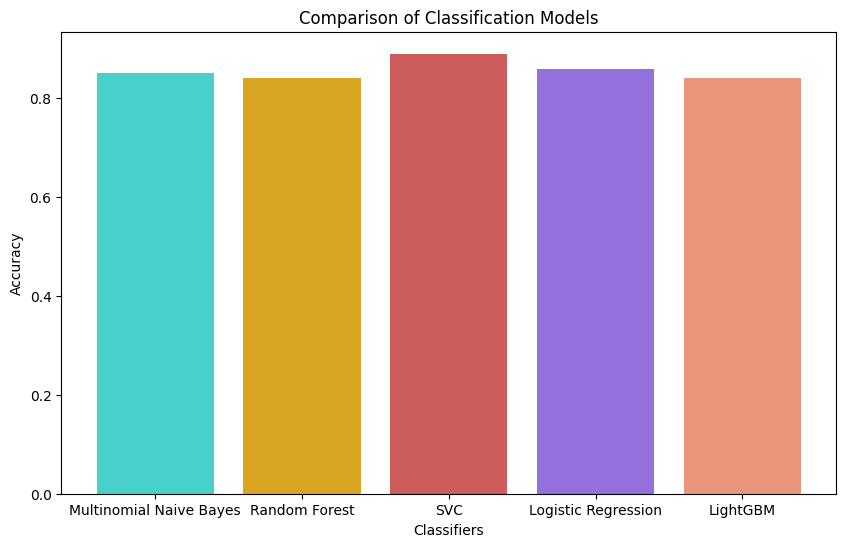

In [ ]:
plt.figure(figsize=(10,6))
classifiers = ['Multinomial Naive Bayes','Random Forest','SVC','Logistic Regression','LightGBM']
accuracy = [
    round(accuracy_score(y_test,nb_pred),2),
    round(accuracy_score(y_test,rf_pred),2),
    round(accuracy_score(y_test,svc_pred),2),
    round(accuracy_score(y_test,lr_pred),2),
    round(accuracy_score(y_test,lgb_pred),2)
]

plt.bar(classifiers,accuracy,color=['#48D1CC', '#DAA520', '#CD5C5C', '#9370DB', '#E9967A'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Comparison of Classification Models')
plt.show()

SVC and Logistic Regression demonstrate the highest accuracy, closely followed by LightGBM. These models outperform Multinomial Naive Bayes and Random Forest in classifying fake reviews. This suggests that SVC, Logistic Regression, and LightGBM are more effective for this specific task due to their ability to capture complex relationships within the datase

# Improving the performance of our best trained models by applying hyper parameter tuning

## Enhanced Logistic Regression Model

In [ ]:
lr2_pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression(penalty='l2', solver='saga', max_iter=1000))
])

Using L2 regularization with logistic regression as for a large dataset, it can prevent overfitting while ensuring the model generalizes well to new data. Saga solver is efficient for large datasets, supports L2 regularization and is better suited for sparse features (like TF-IDF).

In [ ]:
param_grid_lr = {
    'bow__max_features': [10000, 20000],  #setting a limit to control the size of the feature space
    'classifier__C': [0.1, 1, 10],          #smaller C values to avoid overfitting
}

In [ ]:
random_search = RandomizedSearchCV(
    estimator=lr2_pipeline,
    param_distributions=param_grid_lr,
    n_iter=5,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('bow',
                                              CountVectorizer(analyzer=<function text_process at 0x7f221ce39760>)),
                                             ('tfidf', TfidfTransformer()),
                                             ('classifier',
                                              LogisticRegression(max_iter=1000,
                                                                 solver='saga'))]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bow__max_features': [10000, 20000],
                                        'classifier__C': [0.1, 1, 10]},
                   scoring='accuracy', verbose=2)

In [ ]:
best_lr_pipeline = random_search.best_estimator_
lr2_pred = best_lr_pipeline.predict(X_test)

print(f"Best Parameters: {random_search.best_params_}")
print('Classification Report:',classification_report(y_test,lr2_pred))
print('Confusion Matrix:',confusion_matrix(y_test,lr2_pred))
print('Accuracy Score:',accuracy_score(y_test,lr2_pred))

Best Parameters: {'classifier__C': 10, 'bow__max_features': 10000}
Classification Report:               precision    recall  f1-score   support

          CG       0.88      0.87      0.88      4131
          OR       0.87      0.87      0.87      3953

    accuracy                           0.87      8084
   macro avg       0.87      0.87      0.87      8084
weighted avg       0.87      0.87      0.87      8084

Confusion Matrix: [[3614  517]
 [ 512 3441]]
Accuracy Score: 0.8727115289460663


The tuned logistic regression (LR) model improved over the accuracy of the base line LR model but since the baseline SVC Model still has the best overall accuracy, so now we will check if it can be improved further

## Enhanced SVC Model

In [ ]:
svc2_pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC(kernel='linear', probability=True))
])

In [ ]:
param_grid_svc = {
    'bow__max_features': [10000, 15000],  #setting a limit to control the size of the feature space
    'classifier__C': [0.1, 1, 10],          #smaller C values to avoid overfitting
}

In [ ]:
random_search_svc = RandomizedSearchCV(
    estimator=svc2_pipeline,
    param_distributions=param_grid_svc,
    n_iter=3,
    cv=2,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

random_search_svc.fit(X_train, y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('bow',
                                              CountVectorizer(analyzer=<function text_process at 0x7f221ce39760>)),
                                             ('tfidf', TfidfTransformer()),
                                             ('classifier',
                                              SVC(kernel='linear',
                                                  probability=True))]),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'bow__max_features': [10000, 15000],
                                        'classifier__C': [0.1, 1, 10]},
                   scoring='accuracy', verbose=2)

In [ ]:
best_svc_pipeline = random_search_svc.best_estimator_
svc_pred2 = best_svc_pipeline.predict(X_test)

print("SVM Results with RandomizedSearchCV:")
print(f"Best Parameters: {random_search_svc.best_params_}")
print('Classification Report:',classification_report(y_test,svc_pred2))
print('Confusion Matrix:',confusion_matrix(y_test,svc_pred2))
print('Accuracy Score:',accuracy_score(y_test,svc_pred2))

SVM Results with RandomizedSearchCV:
Best Parameters: {'classifier__C': 1, 'bow__max_features': 15000}
Classification Report:               precision    recall  f1-score   support

          CG       0.87      0.87      0.87      4131
          OR       0.86      0.87      0.87      3953

    accuracy                           0.87      8084
   macro avg       0.87      0.87      0.87      8084
weighted avg       0.87      0.87      0.87      8084

Confusion Matrix: [[3590  541]
 [ 527 3426]]
Accuracy Score: 0.867887184562098


Despite performing hyperparameter tuning using RandomizedSearchCV, the optimized SVM model resulted in a slightly lower accuracy compared to the baseline model. This could be due to overfitting or suboptimal hyperparameters found during the tuning process, leading to a model that generalizes less effectively on unseen data.

Since SVM is also very computationaly expensive specially with hyper parameter tuning so optimizing it with a better set of parameters is not very feasible and since our baseline model is giving a decent accuracy, we will go ahead with that

# Selecting the best model

Base line SVC gave the best accuracy therfore it is chosen as our classifier for fake review detection problem

In [ ]:
import pickle
with open("svc_model.pkl", "wb") as file:
    pickle.dump(svc_pipeline, file)